In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning for Vision

- Convolution Operation
- Pooling
- Convolutional Neural Networks



## Convolution Operation





## Convolutional Neural Networks (CNNs)


Neural Networks vs Convolutional Neural Networks
In a typical neural network, each neuron in the input layer is connected to a neuron in the hidden layer. However, in a CNN, only a small region of input layer neurons connect to neurons in the hidden layer. These regions are referred to as local receptive fields, which is translated across an image to create a feature map from the input layer to the hidden layer neurons. To implement this process efficiently, convolution is applied.

In CNNs, the weights and bias values are the same for all hidden neurons in a given layer. This means that all hidden neurons are detecting the same feature such as an edge or a blob in different regions of the image. This makes the network tolerant to translation of objects in an image. For example, a network trained to recognize cats, will be able to do so, whenever the cat is in the image.

### Activation and Pooling
The activation step applies a transformation the the output of the neuron by using activation functions. Rectified Linear Unit, or ReLU, is a commonly used activation function. It takes the output of a neuron and maps it to the highest positive value. If the output is negative, the function maps it to zero.

Pooling further transforms the output of the activation step and reduces the dimensionality of the featured map by condensing the output of small regions of neurons into a single output, which helps simplifying the following layers, and reduces the number of parameters that the model needs to learn.

Every hidden layer increases the complexity of the learned image features. For example, the first layer might learn how to detect edges, and the last layer might learn how to detect more complex shapes.

### Backpropagation
Short for "backward propagation of errors", it is a supervised algorithm used to minimize errors in predictions made by neural networks. The chain rule in calculus is applied: 
$$\frac{dx}{du}=\frac{du}{dy}\times \frac{dx}{dv}$$

If $y=g(u)$ and $u=f(x)$ then $y=g(f(x))$

### Activation Function

Activation functions are mathematical operations used for deciding if the input is important for prediction to determine the whether or not a neuron should be activated based on its input to the network. If an input is important, the function activates the neuron.

Types of Activation Functions
- Binary Step
- Linear Activation
- Nonlinear Activation

<br>

1. Binary Step Activation Function: This function uses a threshold value to determine whether or not a neuron should be activated. If the input is greater than the threshold, the neuron is activated and its output is passed on to the next hidden layer.

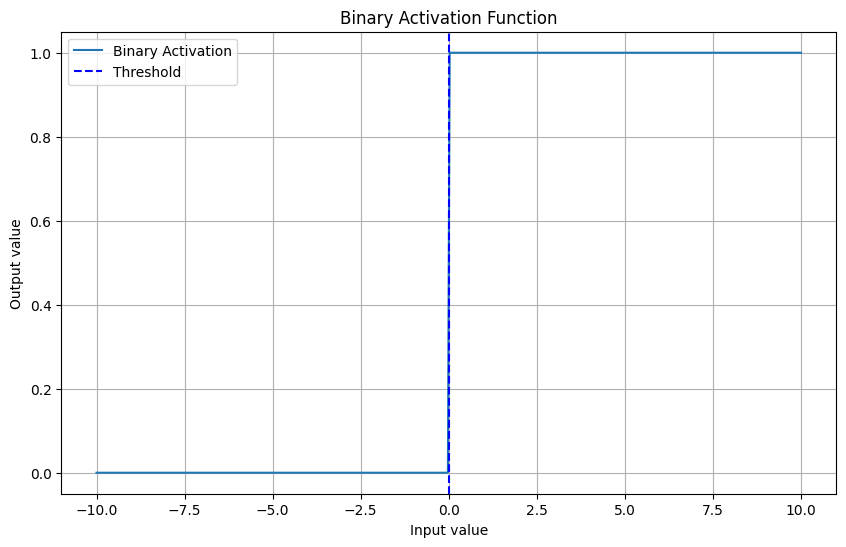

In [12]:
def binary_activation(x, threshold=0):
    """
    Demonstrative Binary activation function.
    
    Args:
    x (float or np.ndarray): Input value or array of input values.
    threshold (float): Threshold value for activation. Default is 0.
    
    Returns:
    int or np.ndarray: Binary output, either 0 or 1.
    """
    return np.where(x >= threshold, 1, 0)

def binary_activation_function(threshold=0):
    # Generate a range of input values
    x_values = np.linspace(-10, 10, 400)
    y_values = binary_activation(x_values)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Binary Activation')
    plt.axvline(x=threshold, color='b', linestyle='--', label='Threshold')
    plt.title('Binary Activation Function')
    plt.xlabel('Input value')
    plt.ylabel('Output value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Demonstrate the binary activation function
binary_activation_function()


2. Linear Activation Function: Sometimes referred as "identity function", in this function the activation is directly proportional to the input. The function does not modify the weighted sum of the input and simply returns the value it was given. 

    The main two issues with the linear activation function are, (i) the function is not fit for backpropagation because the derivative of the function is a constant with no relation to the input and this causes all layers of the neural network to collapse into one, (ii) no matter how many layers exist, the final layer is a linear function of the first layer which reduces the network into a single layer.

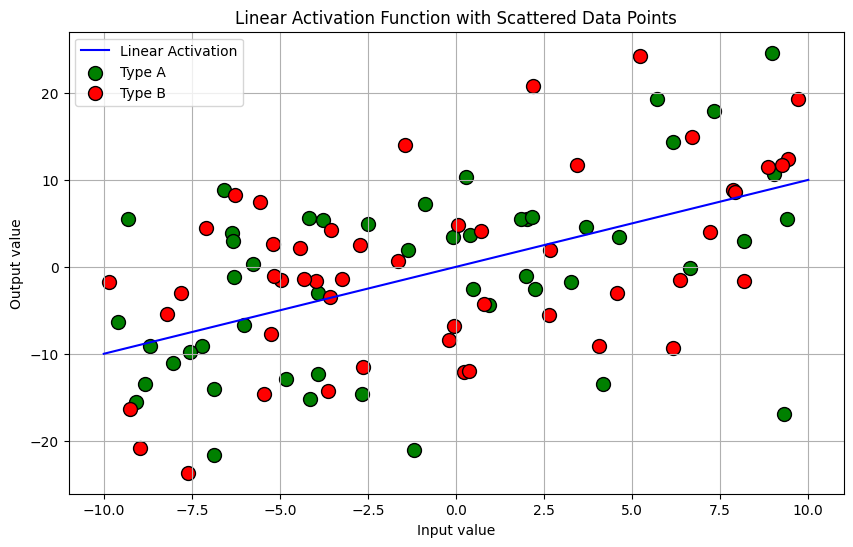

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def linear_activation_func(x):
    """
    Linear activation function.
    
    Args:
    x (float or np.ndarray): Input value or array of input values.
    
    Returns:
    float or np.ndarray: Linear output, which is the same as the input.
    """
    return x

def linear_activation_sample():
    # Generate a range of input values
    x_values = np.linspace(-10, 10, 400)
    # Apply the linear activation function
    y_values = linear_activation_func(x_values)
    
    # Generate random data points for two types of circles
    np.random.seed(42)  # For reproducibility
    x_data1 = np.random.uniform(-10, 10, 50)
    y_data1 = linear_activation_func(x_data1) + np.random.normal(0, 10, 50)
    
    x_data2 = np.random.uniform(-10, 10, 50)
    y_data2 = linear_activation_func(x_data2) + np.random.normal(0, 10, 50)
    

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Linear Activation', color='b')
    

    plt.scatter(x_data1, y_data1, label='Type A', color='g', marker='o', edgecolor='black', s=100)
    plt.scatter(x_data2, y_data2, label='Type B', color='r', marker='o', edgecolor='black', s=100)
    
    plt.title('Linear Activation Function with Scattered Data Points')
    plt.xlabel('Input value')
    plt.ylabel('Output value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Demonstrate the linear activation function
linear_activation_sample()


## Transformers

Main idea

- Concatenate / add a special positional encoding $p_j$ to each input vector $x_j$
- The encoding can be formulated as a function $pos: N \rightarrow R^d $ which transforms the position $j$ of the input into a $d$-dimensional vector $p_j = pos(j)$
- The function is designed with desired properties:
$$p(t) = \begin{bmatrix} \sin (\omega_1\cdot t) \\ \cos(\omega_1\cdot t) \\ sin(\omega_2 \cdot t) \\ cos(\omega_2 \cdot t) \\ . \\ . \\ . \\ sin(\omega_{d/2} \cdot t) \\ cos(\omega_{d/2} \cdot t)\end{bmatrix}$$